In [164]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [55]:
df = pd.read_csv("Data/data.csv")
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [167]:
df.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

In [56]:
# Encoding "Object" variables City_tier and Occupation using onehot encoder.
encoder = OneHotEncoder()
to_be_encoded = df[["Occupation", "City_Tier"]]
encoder.fit(to_be_encoded)
to_be_encoded = pd.DataFrame(encoder.transform(to_be_encoded).toarray())
occupation_encoded = to_be_encoded.iloc[:, :4]
city_tier_encoded = to_be_encoded.iloc[:, 4:]
city_tier_encoded.columns = encoder.categories_[1]
occupation_encoded.columns = encoder.categories_[0]

In [62]:
# df.drop(["Occupation", "City_Tier"], inplace=True)
data_final = pd.concat([df, city_tier_encoded, occupation_encoded], axis=1)

In [68]:
data_final.drop(["Occupation", "City_Tier"],axis=1, inplace=True)

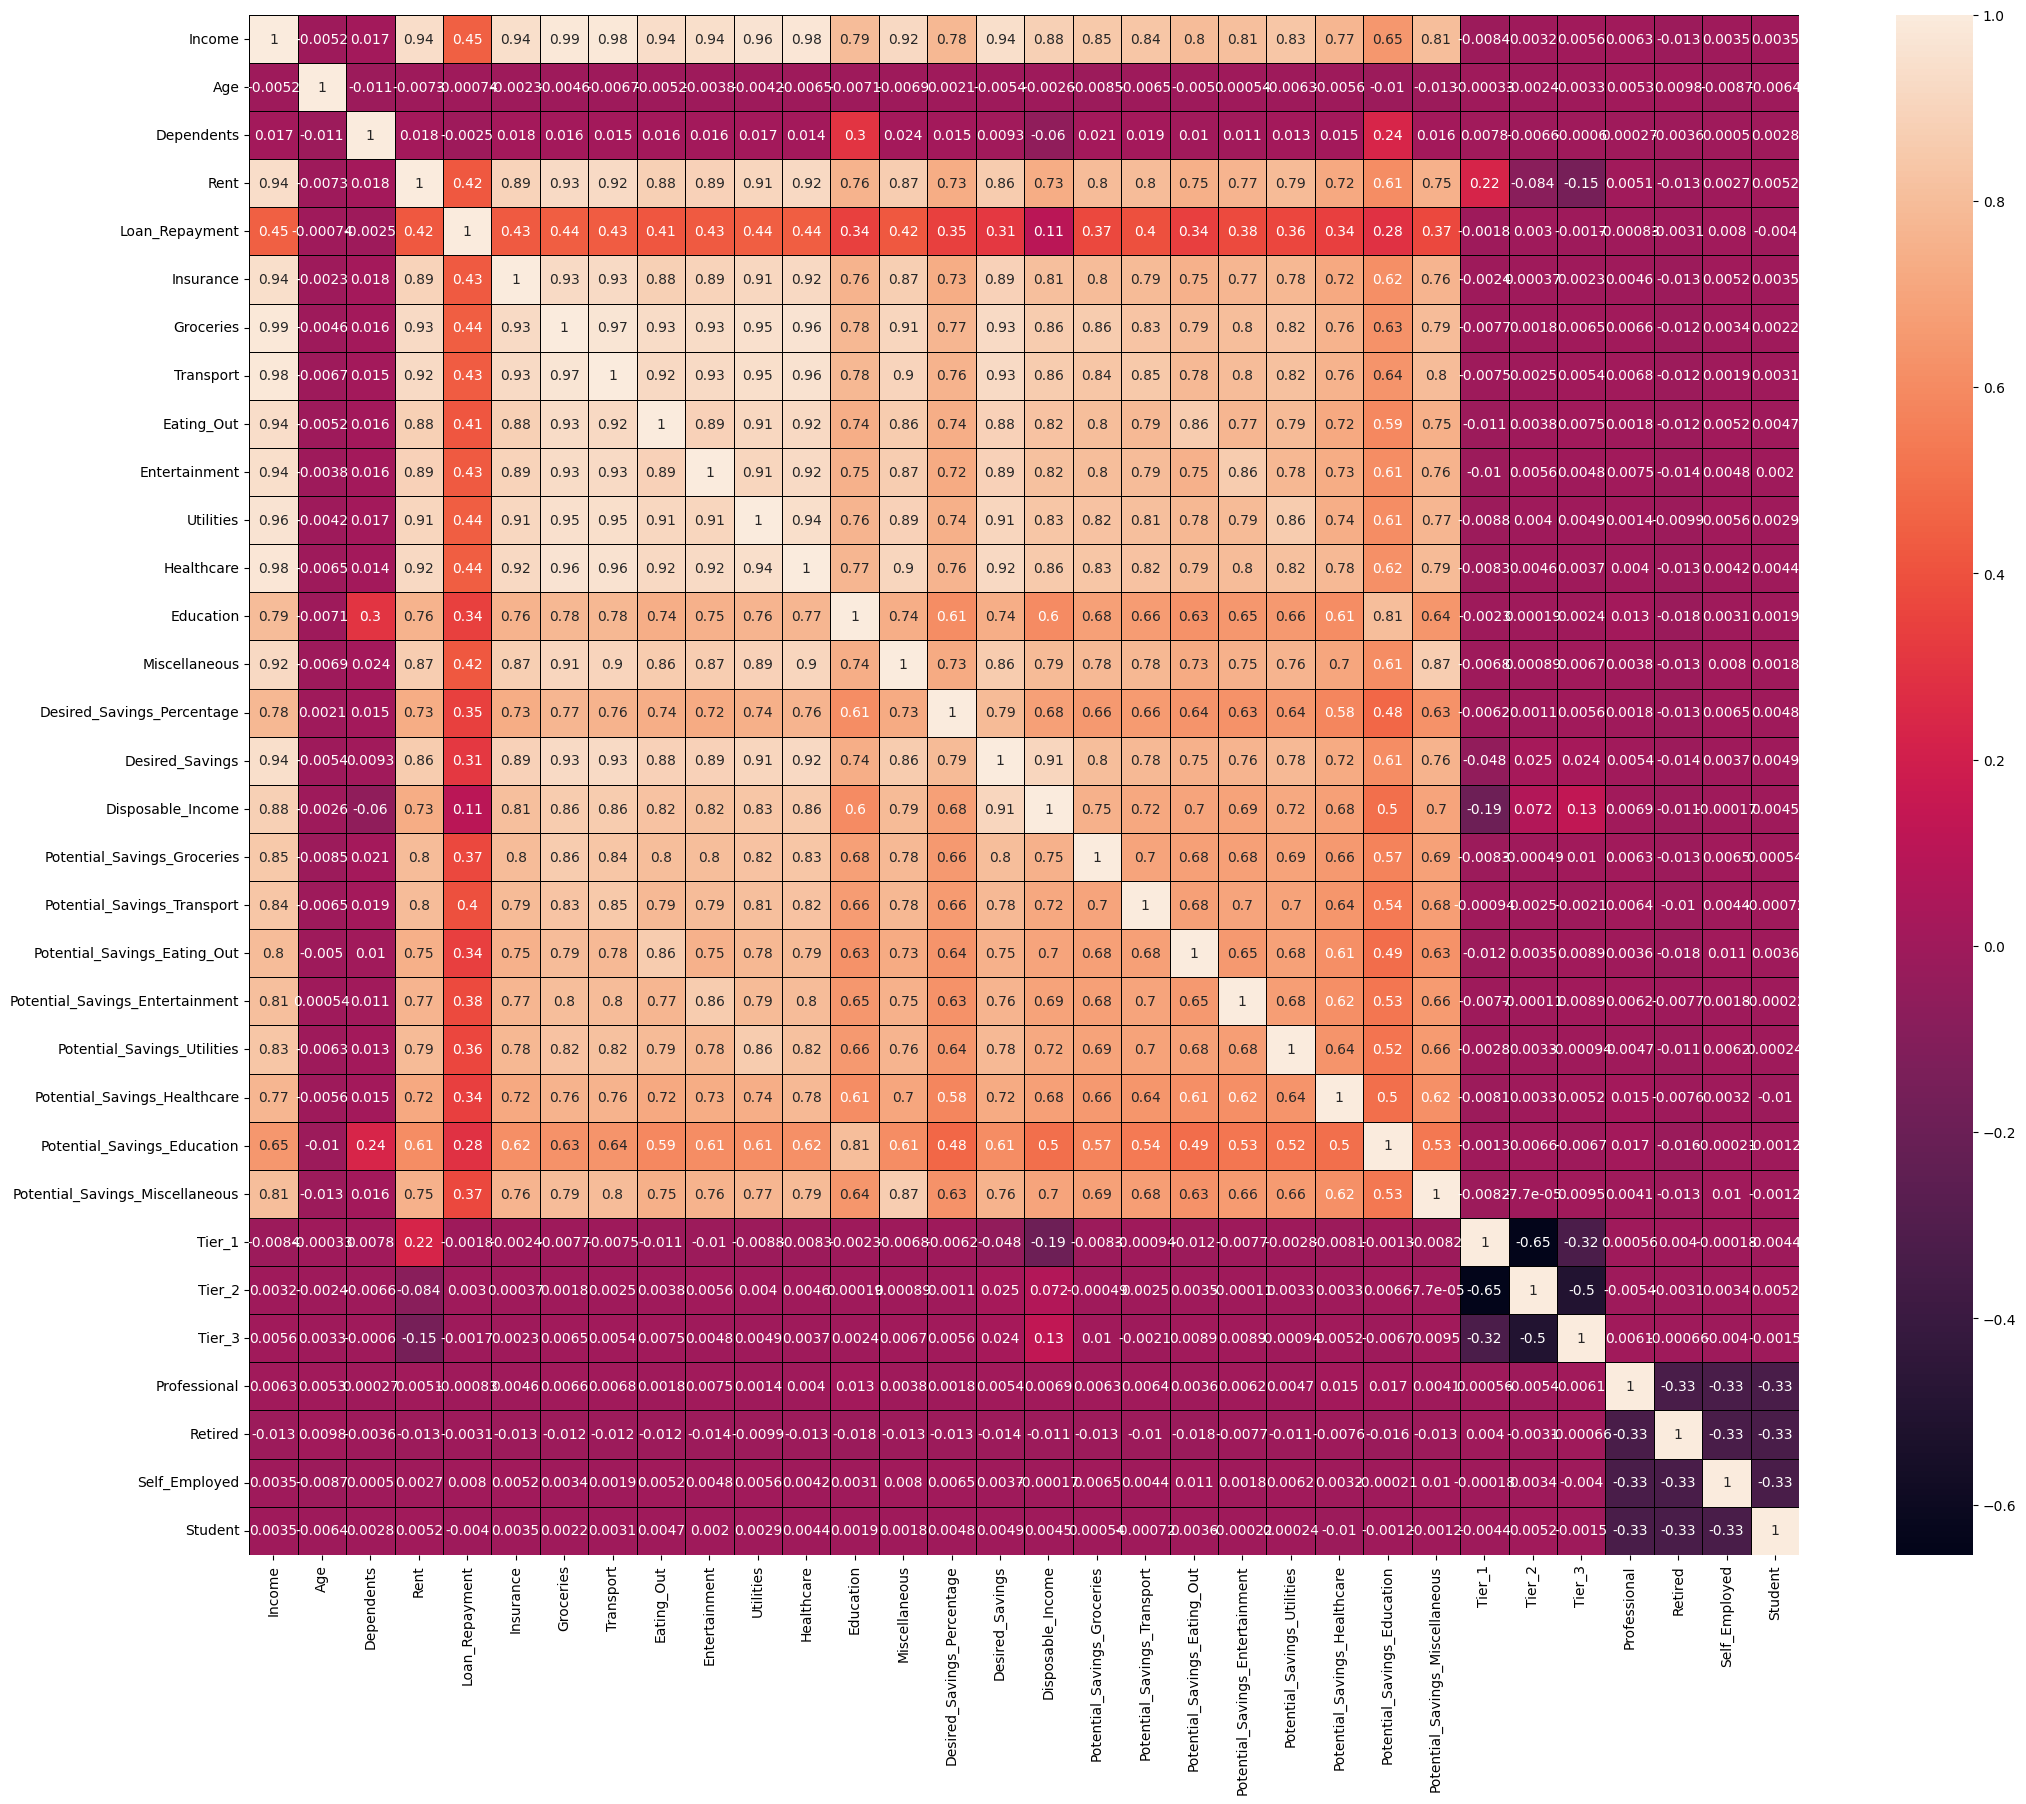

In [78]:
correlation_matrix = data_final.corr()
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(correlation_matrix, ax=ax, linewidths=0.6, linecolor="black", annot=True)
plt.show()

In [87]:
data_final = data_final[['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
       'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
       'Healthcare', 'Education', 'Disposable_Income', 'Tier_1', 'Tier_2', 'Tier_3', 'Professional', 'Retired',
       'Self_Employed', 'Student']]
data_final.dropna(axis=0)

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Healthcare,Education,Disposable_Income,Tier_1,Tier_2,Tier_3,Professional,Retired,Self_Employed,Student
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,1546.914539,0.000000,11265.627707,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1137.351325,1551.723167,9676.818733,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,2178.515847,3160.026299,13891.450624,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,4571.118217,0.000000,31617.953615,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,1169.095816,1445.215694,6265.700532,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,1945.982149,1210.454952,...,1938.821782,2841.315106,1163.318310,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19996,90295.772638,21,1,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,3770.919375,2356.408295,...,2726.601476,5284.429024,30725.175170,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19997,40604.567373,30,1,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,896.290751,1571.911103,...,2025.398570,3910.466560,2267.905134,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19998,118157.817240,27,2,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,2545.419412,4721.792454,...,5304.363988,6237.319313,10603.684814,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
data_final.Income.describe()

count    2.000000e+04
mean     4.158550e+04
std      4.001454e+04
min      1.301187e+03
25%      1.760488e+04
50%      3.018538e+04
75%      5.176545e+04
max      1.079728e+06
Name: Income, dtype: float64

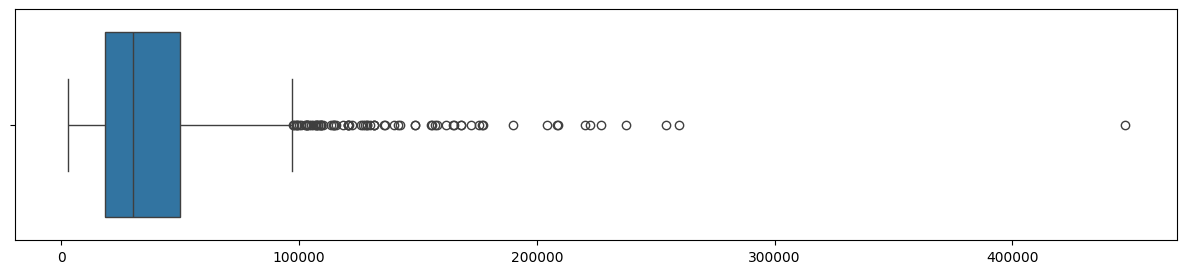

In [138]:
# Box and whiskers plot for income
import random
fig, ax = plt.subplots(figsize=(15, 3))
# Taking 1000 random samples for boxplot
x = [random.choice(np.array(data_final.Income)) for i in range(1000)]
sns.boxplot(x, orient='h')
plt.show()
# Since income has outliers, and all other spendings are very much dependant on income, it is wise to use Z-score nomalization here.

In [140]:
# We are going to use a random forest classifier after using data normalization
pipe = Pipeline([
    ("Scaler", StandardScaler()),
    ("Classifier", RandomForestClassifier(criterion="entropy"))
])
pipe

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier', RandomForestClassifier(criterion='entropy'))])

In [141]:
data_final.columns

Index(['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
       'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
       'Healthcare', 'Education', 'Disposable_Income', 'Tier_1', 'Tier_2',
       'Tier_3', 'Professional', 'Retired', 'Self_Employed', 'Student'],
      dtype='object')

In [152]:
X = data_final[['Income', 'Professional', 'Retired', 'Self_Employed', 'Student', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
       'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
       'Healthcare', 'Education', 'Disposable_Income']]
y = df["City_Tier"]

X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

(len(X_train), len(y_train), len(X_test), len(y_test))

(16000, 16000, 4000, 4000)

In [153]:
pipe.fit(X=X_train, y=y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier', RandomForestClassifier(criterion='entropy'))])

In [166]:
pred = pipe.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"{score*100}%")

99.8%
